In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker
plt.style.use('seaborn')

数据处理

In [2]:
# bench_mark = pd.read_csv('../data/累计收益率_benchmark.csv', index_col=0)
# bench_mark.columns = ['benchmark']
# tmp_df = pd.DataFrame([-2], columns=['benchmark'])
# bench_mark = pd.concat([tmp_df, bench_mark], axis=0)
# bench_mark.index = list(range(1, 1+len(bench_mark)))
# bench_mark

In [3]:
# data = pd.read_csv('../data/累计收益率.csv', index_col=0)
# data.columns = ['ARMA-ARCH-before','ARMA-ARCH-update', 'ARIMA-before','ARIMA-update', 'GAM-before','GAM-update', 'LM-before','LM-update', 'LSTM-before','LSTM-update']
# data

In [4]:
# data = pd.concat([data, bench_mark], axis=1)
# data

In [5]:
# data.to_csv('../data/累计收益率_final.csv')

In [6]:
# 日期
date_range = pd.read_csv('../data/gold_complete.csv', index_col=0)[-800:]['Date'].values

In [7]:
data = pd.read_csv('../data/累计收益率_final.csv', index_col=0)
data

,ARMA-ARCH-before,ARMA-ARCH-update,ARIMA-before,ARIMA-update,GAM-before,GAM-update,LM-before,LM-update,LSTM-before,LSTM-update,benchmark
1,-4.330428,-1.567536,-9.287872,-4.165167,-7.422133,-3.514637,-6.683871,-2.996597,-3.474776,-1.629547,-2.000000
2,-15.705652,-7.093182,-19.342014,-9.082703,-14.866442,-7.095378,-13.023087,-6.063777,-12.153918,-5.755838,-9.057715
3,-11.490248,-4.920335,-4.674442,-1.748554,-11.690005,-5.224086,-11.788465,-5.407788,-12.986110,-5.999057,-25.202278
4,-8.717839,-4.031944,-6.272387,-2.698334,-15.789575,-7.430685,-13.550923,-6.340923,-20.596512,-9.899572,-18.379617
5,-5.250251,-0.738543,-2.822361,-0.830229,-12.520220,-5.536349,-11.817959,-4.884619,-13.143324,-2.447700,-20.183367
...,...,...,...,...,...,...,...,...,...,...,...
795,662.316461,1362.827267,465.369330,1204.056950,687.122937,1349.888571,760.175269,1381.649783,1199.190491,1871.270357,1402.179045
796,664.884890,1363.825085,471.337056,1206.970683,688.872933,1350.468771,764.486928,1383.690762,1202.203839,1872.486114,1412.706472
797,669.521933,1366.473670,472.041004,1207.483356,692.773113,1352.731388,768.855762,1386.178737,1205.741653,1874.807673,1414.576317
798,671.077227,1367.033451,472.033747,1207.135203,695.228352,1353.756742,772.854669,1388.059769,1204.939786,1874.001714,1417.525727


In [25]:
sharpe = pd.read_csv('../data/SharpeRatio.csv', index_col=0)
sharpe = sharpe.loc[:,['V2','V4','V6','V8','V10']]
sharpe.columns = ['ARMA-ARCH-Mean Variance', 'ARIMA-Mean Variance', 'GAM-Mean Variance','LM-Mean Variance','LSTM-TrafficLightSignalModel']
sharpe

,ARMA-ARCH-Mean Variance,ARIMA-Mean Variance,GAM-Mean Variance,LM-Mean Variance,LSTM-TrafficLightSignalModel
1,-0.181215,-0.481514,-0.406310,-0.346422,-0.188384
2,-0.664677,-0.591527,-0.430725,-0.368949,-0.496349
3,0.250632,0.845973,0.215848,0.075666,-0.028055
4,0.104029,-0.111218,-0.258390,-0.109269,-0.456745
5,0.406975,0.230847,0.234089,0.179960,0.920849
...,...,...,...,...,...
795,1.039660,1.117683,0.849679,1.223951,0.481439
796,0.137650,0.401951,0.080039,0.281554,0.167714
797,0.371447,0.071899,0.317317,0.348922,0.325583
798,0.078816,-0.049019,0.144368,0.264846,-0.113478


以上忽略

-----

### 这些都是预测最后800天的

##  sharpe率

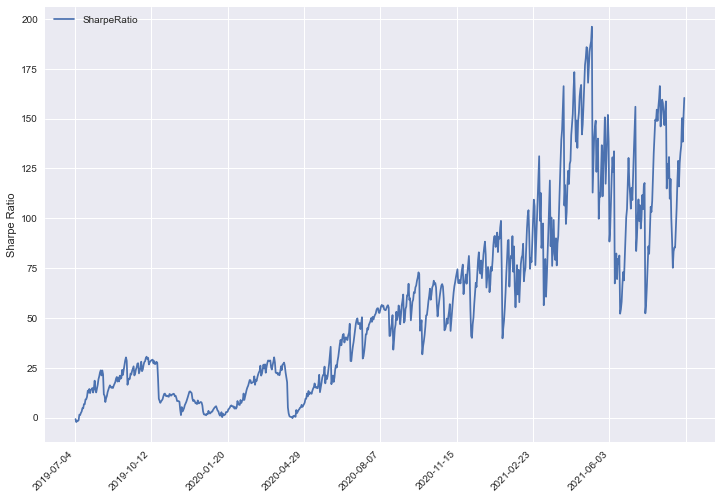

In [20]:
# 可视化
data1 = data[data.columns.difference(['benchmark'])]
fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)
ax.plot(np.arange(1, sharpe.shape[0]+1), sharpe, label = 'SharpeRatio')
# 设置坐标轴格式
def format_date(x, pos=None):
    if x < 0 or x > sharpe.shape[0]:
        return ''
    return date_range[int(x)]
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
plt.legend(loc='upper left')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Sharpe Ratio')
plt.show()

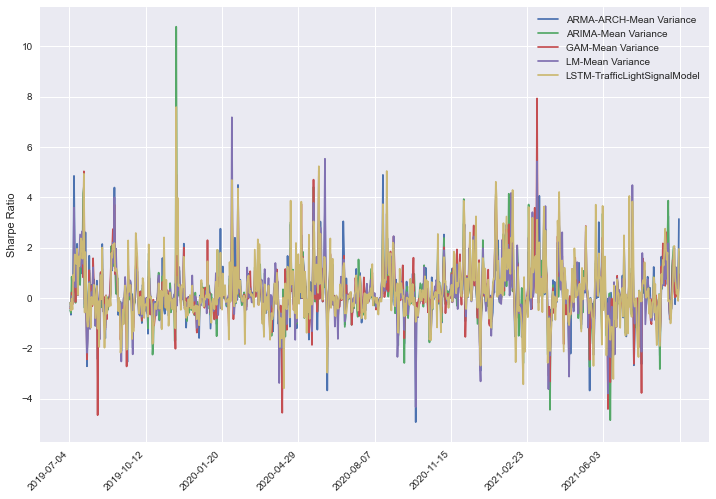

In [27]:
# 可视化
fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)
for i in range(sharpe.shape[1]):
    ax.plot(np.arange(1, sharpe.shape[0]+1), sharpe.iloc[:,i], label = sharpe.columns[i])

# 设置坐标轴格式
def format_date(x, pos=None):
    if x < 0 or x > sharpe.shape[0]:
        return ''
    elif x==800:
        return date_range[-1]
    return date_range[int(x)]
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
plt.legend()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Sharpe Ratio')
plt.show()

##  累计收益率

before 和 update的对比图

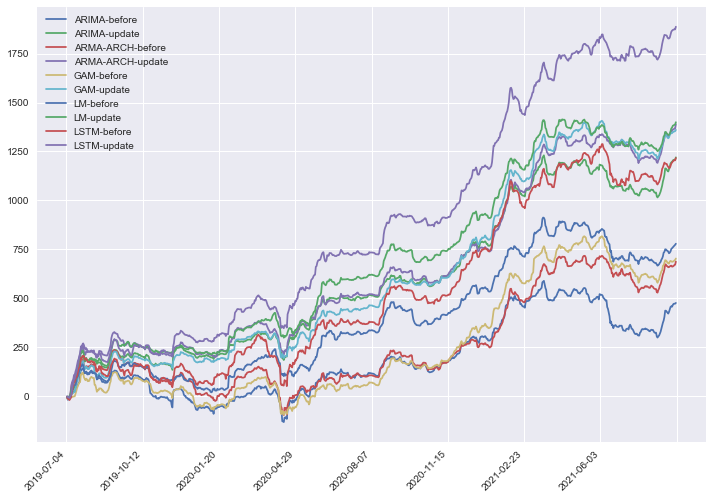

In [10]:
# 可视化
data1 = data[data.columns.difference(['benchmark'])]
fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)
for i in range(data1.shape[1]):
    ax.plot(np.arange(1, data1.shape[0]+1), data1.iloc[:,i], label = data1.columns[i])

# 设置坐标轴格式
def format_date(x, pos=None):
    if x < 0 or x > data1.shape[0]:
        return ''
    elif x==800:
        return date_range[-1]
    return date_range[int(x)]
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
plt.legend()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

update和benchmark的对比图

In [16]:
tmp_data2_columns = ['ARMA-ARCH-Mean Variance', 'ARIMA-Mean Variance', 'GAM-Mean Variance','LM-Mean Variance','LSTM-TrafficLightSignalModel']

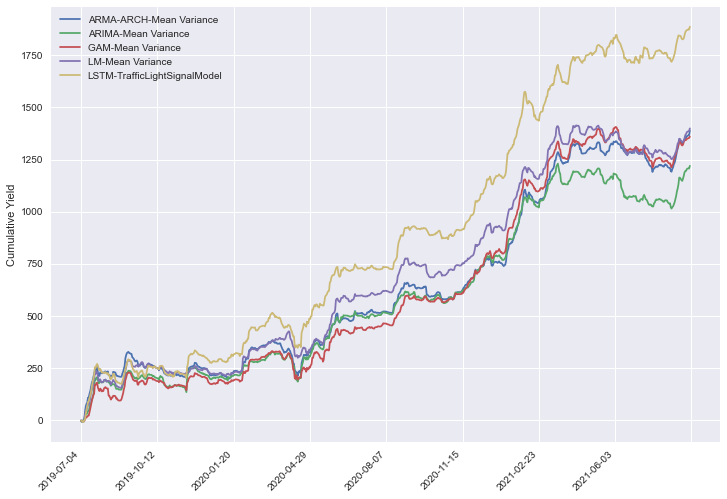

In [19]:
update_name = [name for name in data.columns if name.split('-')[-1] != 'before' and name != 'benchmark']
data2 = data[update_name]

# 可视化
fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)
for i in range(data2.shape[1]):
    ax.plot(np.arange(0, data2.shape[0]), data2.iloc[:,i], label = tmp_data2_columns[i])

# 设置坐标轴格式
def format_date(x, pos=None):
    if x < 0 or x > data2.shape[0]:
        return ''
    elif x==800:
        return date_range[-1]
    return date_range[int(x)]
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
plt.ylabel('Cumulative Yield')
plt.legend()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

全部在一起的图

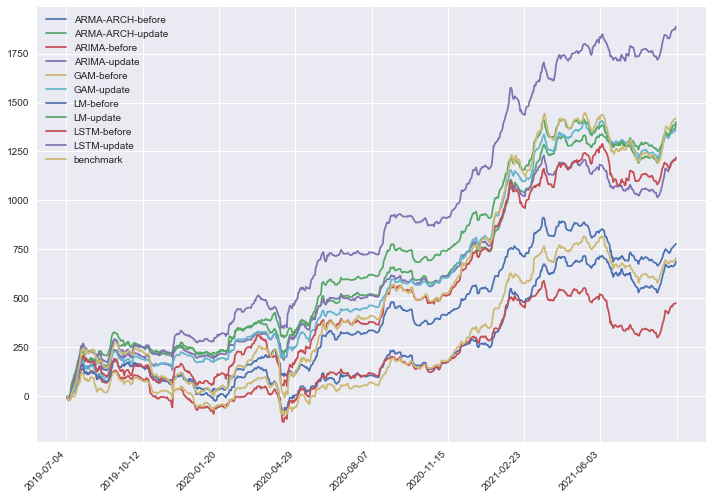

In [12]:
# 可视化
fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)
for i in range(data.shape[1]):
    ax.plot(np.arange(1, data.shape[0]+1), data.iloc[:,i], label = data.columns[i])

# 设置坐标轴格式
def format_date(x, pos=None):
    if x < 0 or x > data.shape[0]:
        return ''
    elif x==800:
        return date_range[-1]
    return date_range[int(x)]
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
plt.legend()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()